In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [1]:
import pandas as pd

# Bankruptcy Prediction Toy Example 

# Get The Data

In [2]:
badStocks = pd.read_csv('badStocks.csv', index_col=0)
badStocks

,Ticker,Name,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,date,YearBankrupt
0,HTZ,The Hertz Corporation,-0.341199,0.000000,-0.045955,-0.005947,31/12/2020,2020
1,JCP,JCPenney,0.099387,-0.459006,-0.070597,0.115782,29/02/2020,2020
2,TLRD,Tailored Brands,0.085321,-0.235100,-0.064157,-0.039053,29/02/2020,2020
3,VALP,Valaris plc,0.013803,0.039672,-0.035438,1.221476,31/12/2019,2020
4,CHK,Chesapeake Energy Corporation,-0.070463,-0.878157,-0.038844,0.370081,31/12/2019,2020
5,INTE,Intelsat Corporation,0.040895,0.000000,0.032920,-0.456283,31/12/2019,2020
6,BGGS,Briggs & Stratton,0.119072,0.640617,-0.025264,0.404377,30/06/2019,2020
7,AKRX,Akorn Inc.,-0.392305,-0.259140,-0.182452,0.222215,31/12/2019,2020
8,MNI,McClatchy,-0.181198,-2.595559,-0.530914,-0.442559,31/12/2019,2020
9,LBY,Libbey Incorporated,0.179659,-0.340264,-0.141904,-0.035205,31/12/2019,2020


In [3]:
goodStocks = pd.read_csv('goodStocks.csv', index_col=0)
goodStocks

,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,Ticker,date
0,-0.003389,-0.525936,0.004580,-0.230224,PSTL,2017-12-31
1,0.216927,-0.013280,-0.027674,0.320702,QDEL,2017-12-31
2,0.127095,0.125750,0.036189,0.917661,TEAM,2015-06-30
3,0.679385,-1.369785,-0.223595,2.597259,ZGNX,2017-12-31
4,0.010277,-0.114241,-0.008875,0.252099,SKT,2018-12-31
5,0.000000,-0.000251,0.019922,0.853294,TPVY,2017-12-31
6,-0.483229,0.141865,0.017564,0.178250,BMA,2015-12-31
7,0.809012,-1.066806,-0.148188,0.193045,HALO,2019-12-31
8,-0.010640,-0.031013,0.030077,0.271809,SFM,2019-12-31
9,0.874379,-3.807828,-0.639818,10.474194,IMUX,2016-12-31


In [5]:
goodStocks['Bankrupt'] = 1
goodStocks = goodStocks[['Ticker',
                         'date',
                         '(CA-CL)/TA',
                         'RE/TA',
                         'EBIT/TA',
                         'BookEquity/TL', 
                         'Bankrupt']]
goodStocks

,Ticker,date,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,Bankrupt
0,PSTL,2017-12-31,-0.003389,-0.525936,0.004580,-0.230224,1
1,QDEL,2017-12-31,0.216927,-0.013280,-0.027674,0.320702,1
2,TEAM,2015-06-30,0.127095,0.125750,0.036189,0.917661,1
3,ZGNX,2017-12-31,0.679385,-1.369785,-0.223595,2.597259,1
4,SKT,2018-12-31,0.010277,-0.114241,-0.008875,0.252099,1
5,TPVY,2017-12-31,0.000000,-0.000251,0.019922,0.853294,1
6,BMA,2015-12-31,-0.483229,0.141865,0.017564,0.178250,1
7,HALO,2019-12-31,0.809012,-1.066806,-0.148188,0.193045,1
8,SFM,2019-12-31,-0.010640,-0.031013,0.030077,0.271809,1
9,IMUX,2016-12-31,0.874379,-3.807828,-0.639818,10.474194,1


In [6]:
badStocks['Bankrupt']=0
badStocks = badStocks[['Ticker',
                       'date',
                       '(CA-CL)/TA',
                       'RE/TA',
                       'EBIT/TA',
                       'BookEquity/TL',
                       'Bankrupt']]
badStocks

,Ticker,date,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,Bankrupt
0,HTZ,31/12/2020,-0.341199,0.000000,-0.045955,-0.005947,0
1,JCP,29/02/2020,0.099387,-0.459006,-0.070597,0.115782,0
2,TLRD,29/02/2020,0.085321,-0.235100,-0.064157,-0.039053,0
3,VALP,31/12/2019,0.013803,0.039672,-0.035438,1.221476,0
4,CHK,31/12/2019,-0.070463,-0.878157,-0.038844,0.370081,0
5,INTE,31/12/2019,0.040895,0.000000,0.032920,-0.456283,0
6,BGGS,30/06/2019,0.119072,0.640617,-0.025264,0.404377,0
7,AKRX,31/12/2019,-0.392305,-0.259140,-0.182452,0.222215,0
8,MNI,31/12/2019,-0.181198,-2.595559,-0.530914,-0.442559,0
9,LBY,31/12/2019,0.179659,-0.340264,-0.141904,-0.035205,0


In [11]:
stocksList = pd.concat([badStocks, goodStocks], ignore_index=True)
stocksList.drop(columns=['Ticker', 'date'], inplace=True)
bankruptList = stocksList['Bankrupt']
stocksList.drop(columns=['Bankrupt'], inplace=True)
stocksList

,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL
0,-0.341199,0.000000,-0.045955,-0.005947
1,0.099387,-0.459006,-0.070597,0.115782
2,0.085321,-0.235100,-0.064157,-0.039053
3,0.013803,0.039672,-0.035438,1.221476
4,-0.070463,-0.878157,-0.038844,0.370081
5,0.040895,0.000000,0.032920,-0.456283
6,0.119072,0.640617,-0.025264,0.404377
7,-0.392305,-0.259140,-0.182452,0.222215
8,-0.181198,-2.595559,-0.530914,-0.442559
9,0.179659,-0.340264,-0.141904,-0.035205


In [8]:
bankruptList

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Bankrupt, dtype: int64

In [9]:
stocksList.to_csv('bankruptStocks.csv')
bankruptList.to_csv('bankruptStocksTarget.csv')

# Use Linear Discriminant Analysis - Like Altman 1968 Paper

In [25]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(stocksList, bankruptList)

print('Bankruptcy Prediction')
print(clf.predict(stocksList))
print('\n')
print('Actual Bankruptcy')
print(np.array(bankruptList))

Bankruptcy Prediction
[0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1]


Actual Bankruptcy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 0, 'Company Stock (50 companies total)')

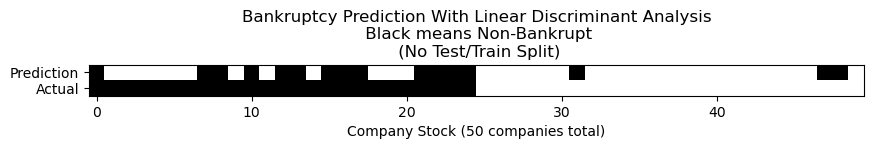

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10), dpi=100)
plt.imshow([clf.predict(stocksList), np.array(bankruptList)], cmap='gnuplot2')
plt.title('Bankruptcy Prediction With Linear Discriminant Analysis\n Black means Non-Bankrupt\n (No Test/Train Split)')
plt.yticks(ticks=[0, 1],labels=['Prediction','Actual'])
plt.xlabel('Company Stock (50 companies total)')

In [109]:
print(clf.intercept_)
print(clf.coef_)

[0.05797746]
[[ 2.19376985 -0.3672349   3.1718622   0.25244928]]


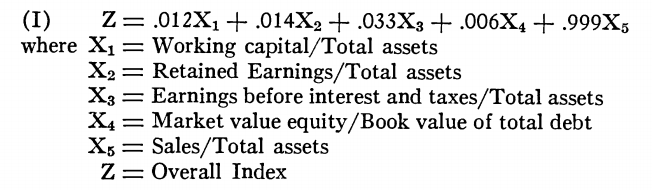

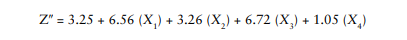

In [106]:
badStocks.mean()

(CA-CL)/TA      -0.144248
RE/TA           -0.500063
EBIT/TA         -0.171577
BookEquity/TL    0.057363
Bankrupt         0.000000
dtype: float64

In [107]:
goodStocks.mean()

(CA-CL)/TA       0.219673
RE/TA           -0.503159
EBIT/TA         -0.124521
BookEquity/TL    1.088780
Bankrupt         1.000000
dtype: float64

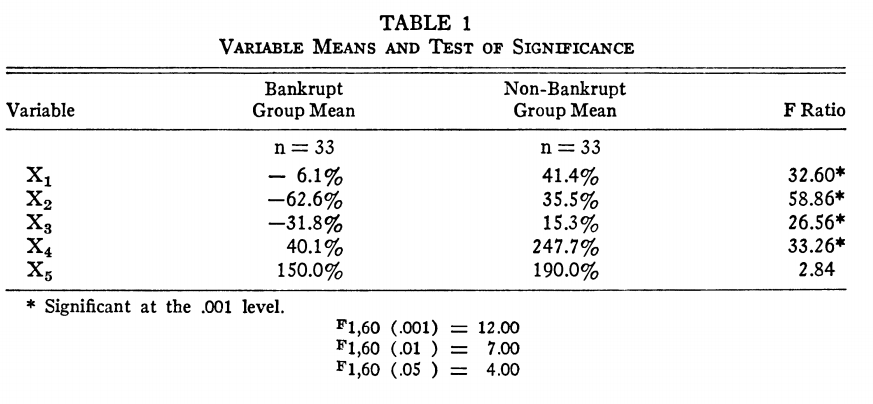

# Try a Decision Tree
With train/test data split this time.
Plotting a validation curve to see how accurate a decision can be from this data.

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [49]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
train_scores, valid_scores = validation_curve(clf, stocksList, bankruptList, 'max_depth',
                                              np.array(range(1,9)),
                                              cv=ShuffleSplit(n_splits=5,
                                                              test_size=0.2,
                                                              random_state=42))

C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass param_name=max_depth, param_range=[1 2 3 4 5 6 7 8] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [50]:
train_scores

array([[0.725, 0.7  , 0.725, 0.8  , 0.775],
       [0.725, 0.725, 0.8  , 0.85 , 0.8  ],
       [0.825, 0.8  , 0.875, 0.875, 0.95 ],
       [0.875, 0.875, 0.95 , 0.975, 0.975],
       [0.95 , 0.925, 0.975, 0.975, 1.   ],
       [0.95 , 0.925, 1.   , 1.   , 1.   ],
       [1.   , 1.   , 1.   , 1.   , 1.   ],
       [1.   , 1.   , 1.   , 1.   , 1.   ]])

In [51]:
valid_scores

array([[0.4, 0.5, 0.7, 0.4, 0.6],
       [0.4, 0.7, 0.5, 0.5, 0.5],
       [0.7, 0.8, 0.5, 0.4, 0.6],
       [0.8, 0.7, 0.4, 0.4, 0.6],
       [0.7, 0.7, 0.4, 0.4, 0.7],
       [0.8, 0.9, 0.4, 0.5, 0.7],
       [0.8, 0.9, 0.4, 0.5, 0.7],
       [0.8, 0.9, 0.4, 0.5, 0.7]])

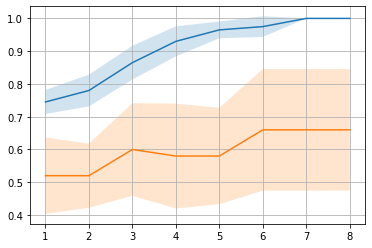

In [52]:
from matplotlib import pyplot as plt
length = len(train_scores)

plt.plot(range(1,length+1), train_scores.mean(axis=1))
plt.fill_between(range(1,length+1),\
                     train_scores.mean(axis=1)-train_scores.std(axis=1),\
                     train_scores.mean(axis=1)+train_scores.std(axis=1), alpha=0.2)
plt.plot(range(1,length+1), valid_scores.mean(axis=1))
plt.fill_between(range(1,length+1),\
                     valid_scores.mean(axis=1)-valid_scores.std(axis=1),\
                     valid_scores.mean(axis=1)+valid_scores.std(axis=1), alpha=0.2)

plt.grid()